<a href="https://colab.research.google.com/github/alharidt16/text-Analysis/blob/main/UAS_TEXT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Akhir Semester Mata Kuliah Text Analysis
- Nama : Al Haridt Mahmudi
- NIM  : 2008108010004

## Get Dataset
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi Threads

In [1]:
!pip install google_play_scraper
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [2]:
result = reviews_all(
        'com.instagram.barcelona',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

threads = pd.DataFrame.from_records(result)
threads = threads[['content', 'score' ]]

In [3]:
threads

,content,score
0,sementara,3
1,Bagus,5
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",1
3,Application that support genocide 🖕,1
4,Payah,1
...,...,...
5336,👍🏻👍🏻👍🏻,5
5337,Hiii. Aku pengguna tercepat,5
5338,Hello bruh,5
5339,"Baru mencobanya, Meta sedang berusaha bersaing...",4


In [4]:
data_review_threads= threads
data_review_threads

,content,score
0,sementara,3
1,Bagus,5
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",1
3,Application that support genocide 🖕,1
4,Payah,1
...,...,...
5336,👍🏻👍🏻👍🏻,5
5337,Hiii. Aku pengguna tercepat,5
5338,Hello bruh,5
5339,"Baru mencobanya, Meta sedang berusaha bersaing...",4


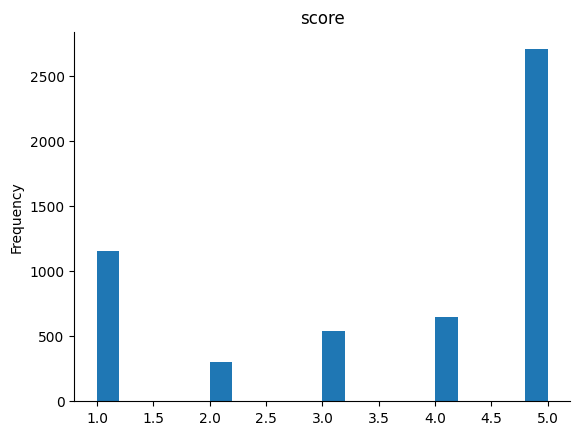

In [5]:
from matplotlib import pyplot as plt
threads['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
def sentiments(rating):
    if (rating == 5) or (rating == 4) :
        return "Positif"
    else :
        return "Negatif"
# Add sentiments to the data
data_review_threads["label"] = data_review_threads["score"].apply(sentiments)
data_review_threads

,content,score,label
0,sementara,3,Negatif
1,Bagus,5,Positif
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",1,Negatif
3,Application that support genocide 🖕,1,Negatif
4,Payah,1,Negatif
...,...,...,...
5336,👍🏻👍🏻👍🏻,5,Positif
5337,Hiii. Aku pengguna tercepat,5,Positif
5338,Hello bruh,5,Positif
5339,"Baru mencobanya, Meta sedang berusaha bersaing...",4,Positif


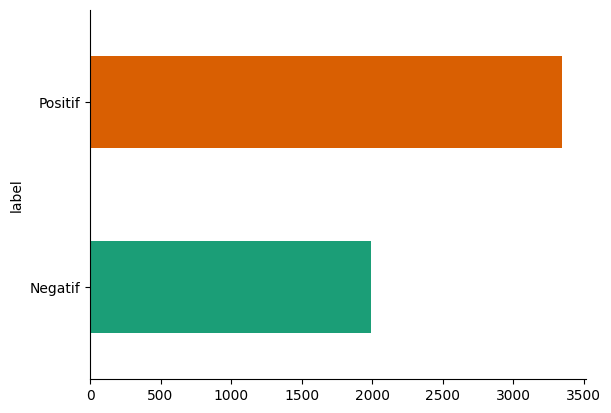

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
threads.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
data_review_threads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5341 non-null   object
 1   score    5341 non-null   int64 
 2   label    5341 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.3+ KB


In [9]:
data_review_threads.isna().any()


content    False
score      False
label      False
dtype: bool

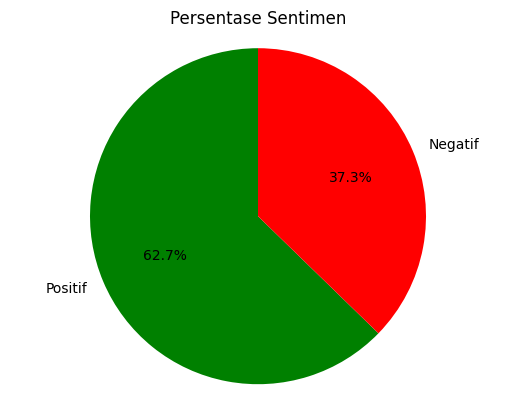

In [10]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen positif, netral dan negatif
positif_count = data_review_threads[data_review_threads['label'] == 'Positif'].shape[0]
negatif_count = data_review_threads[data_review_threads['label'] == 'Negatif'].shape[0]

# Data untuk diagram lingkaran
labels = ['Positif', 'Negatif']
sizes = [positif_count, negatif_count]

# Warna
colors = ['green','red']

# Pengaturan plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Pengaturan tambahan
ax.axis('equal')  # Agar diagram lingkaran terlihat bulat

# Judul diagram
plt.title('Persentase Sentimen')

# Tampilkan diagram lingkaran
plt.show()

## Text PreProcessing
Prapemrosesan teks atau yang lebih dikenal dengan nama text preprocessing yaitu proses membersihkan data sebelum diolah nantinya. Pada tahapan ini terdapat 5 proses diantaranya:

## CLEANING

In [11]:
pd.set_option('display.max_columns', None)
data_review_threads=data_review_threads[['content', 'label']]
data_review_threads.head(20)

,content,label
0,sementara,Negatif
1,Bagus,Positif
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",Negatif
3,Application that support genocide 🖕,Negatif
4,Payah,Negatif
5,curhatan main² dll 😁😁,Positif
6,"Stop Silencing P@l€$tine, IN$TAGR@M D1$KR1MIN@...",Negatif
7,Tidak bagu. Ilang2. Jelek. Tidak bagus. Update...,Negatif
8,Pos gagal di unggah,Negatif
9,Keren banget,Positif


## CASE FOLDING
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.


In [12]:
import re
def  clean_text(df, text_field, new_text_field_name):
    data_review_threads[new_text_field_name] = data_review_threads[text_field].str.lower()
    data_review_threads[new_text_field_name] = data_review_threads[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    data_review_threads[new_text_field_name] = data_review_threads[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return data_review_threads

data_review_threads['text_clean'] = data_review_threads['content'].str.lower()
data_review_threads['text_clean']
data_review_threads_clean = clean_text(data_review_threads, 'content', 'text_clean')
data_review_threads_clean.head(10)

,content,label,text_clean
0,sementara,Negatif,sementara
1,Bagus,Positif,bagus
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",Negatif,sama aja aplikasi tapi ga netral pendukung zio...
3,Application that support genocide 🖕,Negatif,application that support genocide
4,Payah,Negatif,payah
5,curhatan main² dll 😁😁,Positif,curhatan main dll
6,"Stop Silencing P@l€$tine, IN$TAGR@M D1$KR1MIN@...",Negatif,stop silencing ptine intagr dkrmin action ptine
7,Tidak bagu. Ilang2. Jelek. Tidak bagus. Update...,Negatif,tidak bagu ilang jelek tidak bagus update habi...
8,Pos gagal di unggah,Negatif,pos gagal di unggah
9,Keren banget,Positif,keren banget


## STOPWORD REMOVAL
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah emoticon “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [13]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_review_threads_clean['text_StopWord'] = data_review_threads_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_review_threads_clean.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,label,text_clean,text_StopWord
0,sementara,Negatif,sementara,
1,Bagus,Positif,bagus,bagus
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",Negatif,sama aja aplikasi tapi ga netral pendukung zio...,aja aplikasi ga netral pendukung zionist pro i...
3,Application that support genocide 🖕,Negatif,application that support genocide,application that support genocide
4,Payah,Negatif,payah,payah
5,curhatan main² dll 😁😁,Positif,curhatan main dll,curhatan main dll
6,"Stop Silencing P@l€$tine, IN$TAGR@M D1$KR1MIN@...",Negatif,stop silencing ptine intagr dkrmin action ptine,stop silencing ptine intagr dkrmin action ptine
7,Tidak bagu. Ilang2. Jelek. Tidak bagus. Update...,Negatif,tidak bagu ilang jelek tidak bagus update habi...,bagu ilang jelek bagus update habis kuota
8,Pos gagal di unggah,Negatif,pos gagal di unggah,pos gagal unggah
9,Keren banget,Positif,keren banget,keren banget


## TOKENIZING
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_review_threads_clean['text_tokens'] = data_review_threads_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_review_threads_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,label,text_clean,text_StopWord,text_tokens
0,sementara,Negatif,sementara,,[]
1,Bagus,Positif,bagus,bagus,[bagus]
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",Negatif,sama aja aplikasi tapi ga netral pendukung zio...,aja aplikasi ga netral pendukung zionist pro i...,"[aja, aplikasi, ga, netral, pendukung, zionist..."
3,Application that support genocide 🖕,Negatif,application that support genocide,application that support genocide,"[application, that, support, genocide]"
4,Payah,Negatif,payah,payah,[payah]


## STEMMING
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [15]:
!pip install Sastrawi
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_review_threads_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_review_threads_clean['text_steamindo'] = data_review_threads_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_review_threads_clean.head(20)

Streaming output truncated to the last 5000 lines.
587 : after : after
588 : created : created
589 : appeared : appeared
590 : homepage : homepage
591 : didnt : didnt
592 : it : it
593 : kemudahan : mudah
594 : gampang : gampang
595 : hafal : hafal
596 : exskitif : exskitif
597 : terbaik : baik
598 : reborn : reborn
599 : lengkapi : lengkap
600 : muak : muak
601 : bang : bang
602 : elon : elon
603 : familiar : familiar
604 : netizen : netizen
605 : jd : jd
606 : org : org
607 : berinteraksi : interaksi
608 : sepi : sepi
609 : fb : fb
610 : add : add
611 : fiture : fiture
612 : schedule : schedule
613 : post : post
614 : pleaseee : pleaseee
615 : gaada : gaada
616 : fotur : fotur
617 : draftnya : draftnya
618 : ngetik : ngetik
619 : berjam : jam
620 : jam : jam
621 : hilang : hilang
622 : garagara : garagara
623 : hp : hp
624 : mati : mati
625 : berkali : kali
626 : kek : kek
627 : mood : mood
628 : minim : minim
629 : pitur : pitur
630 : deh : deh
631 : ubah : ubah
632 : format : forma

,content,label,text_clean,text_StopWord,text_tokens,text_steamindo
0,sementara,Negatif,sementara,,[],
1,Bagus,Positif,bagus,bagus,[bagus],bagus
2,"Sama aja aplikasi tapi ga netral, pendukung zi...",Negatif,sama aja aplikasi tapi ga netral pendukung zio...,aja aplikasi ga netral pendukung zionist pro i...,"[aja, aplikasi, ga, netral, pendukung, zionist...",aja aplikasi ga netral dukung zionist pro isri...
3,Application that support genocide 🖕,Negatif,application that support genocide,application that support genocide,"[application, that, support, genocide]",application that support genocide
4,Payah,Negatif,payah,payah,[payah],payah
5,curhatan main² dll 😁😁,Positif,curhatan main dll,curhatan main dll,"[curhatan, main, dll]",curhatan main dll
6,"Stop Silencing P@l€$tine, IN$TAGR@M D1$KR1MIN@...",Negatif,stop silencing ptine intagr dkrmin action ptine,stop silencing ptine intagr dkrmin action ptine,"[stop, silencing, ptine, intagr, dkrmin, actio...",stop silencing ptine intagr dkrmin action ptine
7,Tidak bagu. Ilang2. Jelek. Tidak bagus. Update...,Negatif,tidak bagu ilang jelek tidak bagus update habi...,bagu ilang jelek bagus update habis kuota,"[bagu, ilang, jelek, bagus, update, habis, kuota]",bagu ilang jelek bagus update habis kuota
8,Pos gagal di unggah,Negatif,pos gagal di unggah,pos gagal unggah,"[pos, gagal, unggah]",pos gagal unggah
9,Keren banget,Positif,keren banget,keren banget,"[keren, banget]",keren banget


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


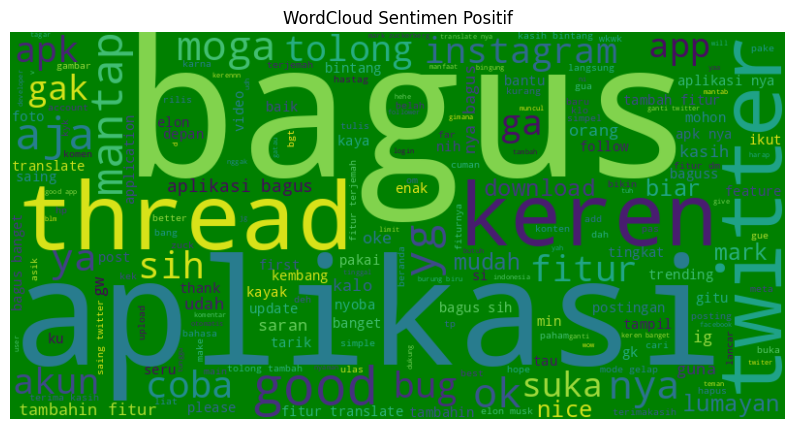

In [17]:
# Menggabungkan semua teks dengan sentimen positif menjadi satu string
text_positive = ' '.join(data_review_threads_clean[data_review_threads_clean['label'] == 'Positif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text_positive)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.show()

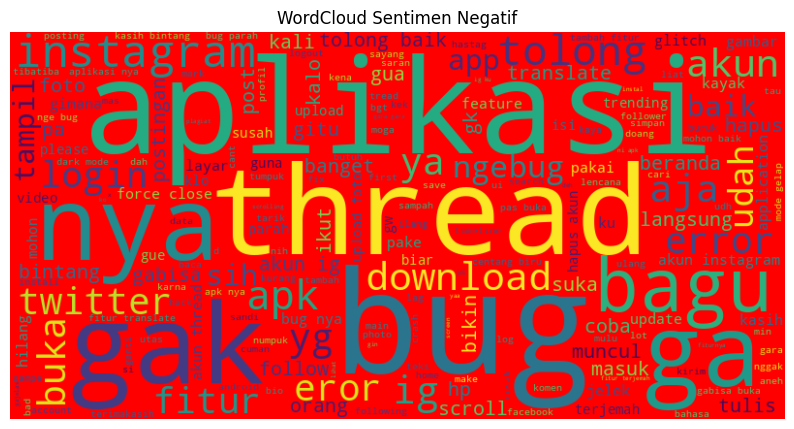

In [18]:
# Menggabungkan semua teks dengan sentimen negatif menjadi satu string
text_negative = ' '.join(data_review_threads_clean[data_review_threads_clean['label'] == 'Negatif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_negative)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.show()

# SPLIT DATA

memecah data test 20% dari keseluruhan data
membagi data Anda menjadi set pelatihan dan set pengujian. Set pelatihan digunakan untuk melatih model Naive Bayes, sedangkan set pengujian digunakan untuk menguji kinerja model.

In [19]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_review_threads_clean['text_steamindo'], data_review_threads_clean['label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

In [20]:
#PEMBOBOTAN
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

X_train.toarray()
y_pred = nb.predict(tfidf_test)

# Akurasi

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.7867165575304023
MultinomialNB Precision: 0.7420289855072464
MultinomialNB Recall: 0.6481012658227848
MultinomialNB f1_score: 0.6918918918918919
confusion_matrix:
 [[256 139]
 [ 89 585]]

              precision    recall  f1-score   support

     Negatif       0.74      0.65      0.69       395
     Positif       0.81      0.87      0.84       674

    accuracy                           0.79      1069
   macro avg       0.78      0.76      0.76      1069
weighted avg       0.78      0.79      0.78      1069



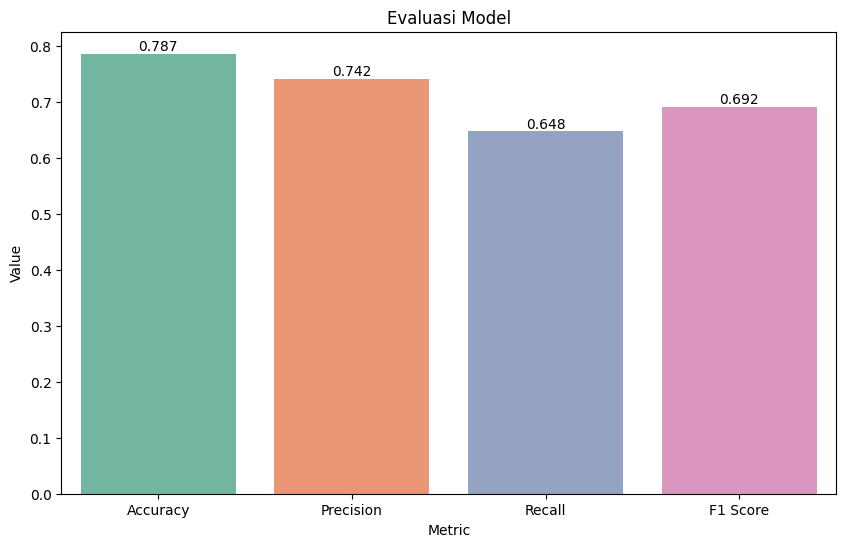

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="binary", pos_label="Negatif")
recall = recall_score(y_test, predicted, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, predicted, average="binary", pos_label="Negatif")

# Menyimpan metrik evaluasi dalam sebuah DataFrame
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                           'Value': [accuracy, precision, recall, f1]})

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title('Evaluasi Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Menampilkan nilai di atas setiap batang
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value, round(value, 3), ha='center', va='bottom')

# Tampilkan grafik
plt.show()

# KESIMPULAN
Berdasarkan Hasil perhitungan mengenai analisis sentimen Review Aplikasi threads intagram di playsotre dengan metode Bayes Classifier diperoleh kesimpulan yaitu metode  Naive Bayes Mampu Melakukan Klasifikasi komentar secara otomatis dengan bahasapemrograman python. Selain itu, Analisis sentimen
terhadap review pengguna aplikasi threads dengan metode Naive Bayes dengan nilai akurasi 79%